In [1]:
import pandas as pd
import numpy as np
import plotly_express as px
from wordcloud import WordCloud

In [2]:
OHCO = ['review_id', 'para_num', 'sent_num', 'token_num']

In [3]:
LIB = pd.read_csv('LIB.csv')
LIB.set_index('review_id', inplace=True)

VOCAB = pd.read_csv('VOCAB.csv')
VOCAB.set_index('term_str', inplace=True)

BOW = pd.read_csv('BOW.csv')
BOW.set_index(['review_id', 'term_str'], inplace=True)

DOC_SENT = pd.read_csv('DOC_SENT.csv')
DOC_SENT.set_index('review_id', inplace=True)

TFIDF_L2 = pd.read_csv('TFIDF_L2.csv')
TFIDF_L2.set_index('review_id', inplace=True)

In [4]:
VOCAB.sort_values('dfidf', ascending=False).head(20)

,n,p,i,porter_stem,max_pos,max_pos_group,stop,df,idf,dfidf
term_str,,,,,,,,,,
good,2887,0.002172,8.846647,good,JJ,JJ,0,1854.0,1.431287,2653.605822
more,2843,0.002139,8.868804,more,RBR,RB,1,1796.0,1.477141,2652.944778
some,3124,0.002350,8.732823,some,DT,DT,1,1906.0,1.391380,2651.970234
when,2729,0.002053,8.927845,when,WRB,WR,1,1769.0,1.498994,2651.720469
what,3176,0.002390,8.709007,what,WP,WP,1,1956.0,1.354022,2648.466493
would,2663,0.002004,8.963165,would,MD,MD,0,1714.0,1.544561,2647.377529
up,2593,0.001951,9.001595,up,RP,RP,1,1698.0,1.558092,2645.639598
very,2661,0.002002,8.964249,veri,RB,RB,1,1671.0,1.581216,2642.212540
only,2326,0.001750,9.158367,onli,RB,RB,1,1660.0,1.590745,2640.636457


In [5]:
TOKENS = pd.read_csv('TOKENS.csv')
TOKENS.set_index(OHCO, inplace=True)

## Riff

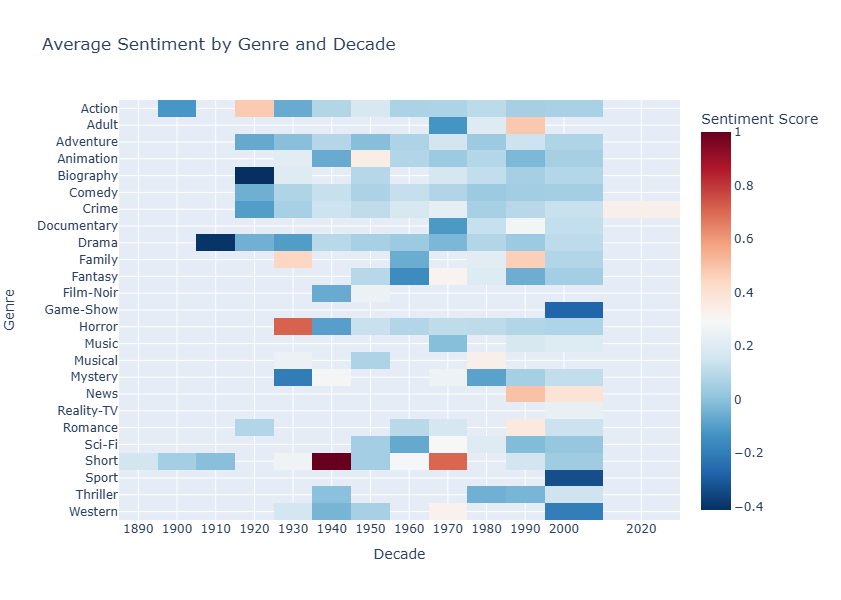

In [13]:
# Create a decade column from the Year
DOC_SENT['Decade'] = (DOC_SENT['Year'] // 10) * 10

# Group by Genre and Decade to get both average sentiment and count
genre_decade_stats = DOC_SENT.groupby(['Genre', 'Decade']).agg(
    avg_sentiment=('sentiment', 'mean'),
    count=('sentiment', 'count')
).reset_index()

# Create a hover text column with both stats
genre_decade_stats['hover_text'] = (
    'Average sentiment: ' + genre_decade_stats['avg_sentiment'].round(3).astype(str) + 
    '<br>Document count: ' + genre_decade_stats['count'].astype(str)
)

# Create the pivot table for sentiment values
heatmap_data = genre_decade_stats.pivot(index='Genre', columns='Decade', values='avg_sentiment')

# Create the pivot table for hover text
heatmap_hover = genre_decade_stats.pivot(index='Genre', columns='Decade', values='hover_text')

# Create the heatmap using Plotly Express
fig = px.imshow(heatmap_data,
               labels=dict(x="Decade", y="Genre", color="Average Sentiment"),
               x=heatmap_data.columns,
               y=heatmap_data.index,
               color_continuous_scale='RdBu_r',
               text_auto=False,  # Don't show text values on cells
               title='Average Sentiment by Genre and Decade',
               height=600)  # Adjust the height here

# Update hover template to use our custom hover text
fig.update_traces(hovertemplate='<b>Genre:</b> %{y}<br><b>Decade:</b> %{x}<br>%{customdata}<extra></extra>',
                 customdata=heatmap_hover.values)

# Improve layout
fig.update_layout(
    xaxis_title="Decade",
    yaxis_title="Genre",
    xaxis=dict(tickmode='array', tickvals=list(heatmap_data.columns)),
    coloraxis_colorbar=dict(title="Sentiment Score")
)

# Show the heatmap
fig.show()

In [7]:
TFIDF_GENRE = TFIDF_L2.join(LIB['Genre'], on='review_id')

In [8]:
BOW.join(LIB, on='review_id')

n        tf     tfidf         File  \
review_id term_str                                        
0         a          2  0.011976  0.000576  41832_0.txt   
          action     1  0.005988  0.019909  41832_0.txt   
          added      1  0.005988  0.036514  41832_0.txt   
          always     1  0.005988  0.019259  41832_0.txt   
          and        5  0.029940  0.001458  41832_0.txt   
...                 ..       ...       ...          ...   
4999      watchable  1  0.006250  0.039158  49638_0.txt   
          were       2  0.012500  0.022931  49638_0.txt   
          with       1  0.006250  0.003165  49638_0.txt   
          you        1  0.006250  0.005523  49638_0.txt   
          young      1  0.006250  0.020408  49638_0.txt   

                                                                  URL  \
review_id term_str                                                      
0         a          http://www.imdb.com/title/tt0478829/usercomments   
          action     http://www.imdb.com/title/tt0478829/usercomments   
          added      http://www.imdb.com/title/tt0478829/usercomments   
          always     http://www.imdb.com/title/tt0478829/usercomments   
          and        http://www.imdb.com/title/tt0478829/usercomments   
...                                                               ...   
4999      watchable  http://www.imdb.com/title/tt0371839/usercomments   
          were       http://www.imdb.com/title/tt0371839/usercomments   
          with       http://www.imdb.com/title/tt0371839/usercomments   
          you        http://www.imdb.com/title/tt0371839/usercomments   
          young      http://www.imdb.com/title/tt0371839/usercomments   

                           ID                 Title    Year  Rating  \
review_id term_str                                                    
0         a          478829.0                 Vitus  2006.0     7.6   
          action     478829.0                 Vitus  2006.0     7.6   
          added      478829.0                 Vitus  2006.0     7.6   
          always     478829.0                 Vitus  2006.0     7.6   
          and        478829.0                 Vitus  2006.0     7.6   
...                       ...                   ...     ...     ...   
4999      watchable  371839.0  Celluloid Nightmares  1999.0     5.0   
          were       371839.0  Celluloid Nightmares  1999.0     5.0   
          with       371839.0  Celluloid Nightmares  1999.0     5.0   
          you        371839.0  Celluloid Nightmares  1999.0     5.0   
          young      371839.0  Celluloid Nightmares  1999.0     5.0   

                            Genres  ...   News Reality-TV Romance  Sci-Fi  \
review_id term_str                  ...                                     
0         a           Drama, Music  ...  False      False   False   False   
          action      Drama, Music  ...  False      False   False   False   
          added       Drama, Music  ...  False      False   False   False   
          always      Drama, Music  ...  False      False   False   False   
          and         Drama, Music  ...  False      False   False   False   
...                            ...  ...    ...        ...     ...     ...   
4999      watchable  Adult, Horror  ...  False      False   False   False   
          were       Adult, Horror  ...  False      False   False   False   
          with       Adult, Horror  ...  False      False   False   False   
          you        Adult, Horror  ...  False      False   False   False   
          young      Adult, Horror  ...  False      False   False   False   

                     Short  Sport  Talk-Show  Thriller    War  Western  
review_id term_str                                                      
0         a          False  False      False     False  False    False  
          action     False  False      False     False  False    False  
          added      False  False      False     False  False    False  
          al

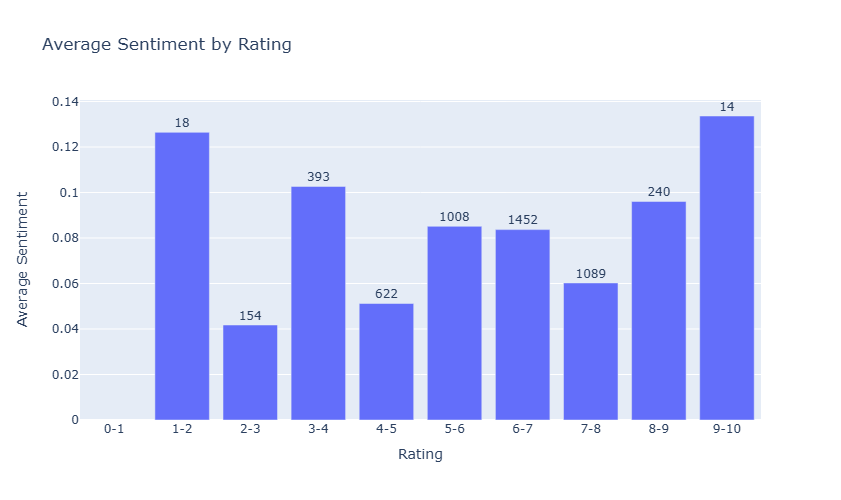

In [9]:
rating_bins = pd.cut(DOC_SENT['Rating'], bins=range(0, 11), right=False, labels=[f'{i}-{i+1}' for i in range(10)])

# Add the binned ratings as a new column to the DataFrame
DOC_SENT['rating_bins'] = rating_bins

# Group by the rating bins and calculate the average sentiment and count for each bin
avg_sentiment_by_rating_bin = DOC_SENT.groupby('rating_bins').agg(
    avg_sentiment=('sentiment', 'mean'),
    count=('sentiment', 'size')
).reset_index()

# Create a bar plot with rating bins on the x-axis and average sentiment on the y-axis
fig = px.bar(avg_sentiment_by_rating_bin, x='rating_bins', y='avg_sentiment',
             title="Average Sentiment by Rating", height = 500,
             labels={'rating_bins': 'Rating', 'avg_sentiment': 'Average Sentiment'})

# Add counts as text on the bars
fig.update_traces(text=avg_sentiment_by_rating_bin['count'], textposition='outside')

fig.show()

In [10]:
TOKENS.join(LIB['Genre'])

pos_tuple  pos  \
review_id para_num sent_num token_num                                  
0         0        0        0                    ('This', 'DT')   DT   
                            1                     ('is', 'VBZ')  VBZ   
                            2                       ('a', 'DT')   DT   
                            3                  ('mildly', 'RB')   RB   
                            4               ('enjoyable', 'JJ')   JJ   
...                                                         ...  ...   
4999      0        10       5                   ('movie', 'NN')   NN   
                            6                    ('was', 'VBD')  VBD   
                            7                       ('a', 'DT')   DT   
                            8          ('disappointment', 'NN')   NN   
                            9                        ('.', '.')    .   

                                      pos_group       token_str  \
review_id para_num sent_num token_num                             
0         0        0        0                DT            This   
                            1                VB              is   
                            2                DT               a   
                            3                RB          mildly   
                            4                JJ       enjoyable   
...                                         ...             ...   
4999      0        10       5                NN           movie   
                            6                VB             was   
                            7                DT               a   
                            8                NN  disappointment   
                            9                 .               .   

                                             term_str  Genre  
review_id para_num sent_num token_num                         
0         0        0        0                    this  Drama  
                            1                      is  Drama  
                            2                       a  Drama  
                            3                  mildly  Drama  
                            4               enjoyable  Drama  
...                                               ...    ...  
4999      0        10       5                   movie  Adult  
                            6                     was  Adult  
                            7                       a  Adult  
                            8          disappointment  Adult  
                            9                     NaN  Adult  

[1329085 rows x 6 columns]

In [11]:
genre_BOW = BOW.join(LIB['Genre'])

genre_BOW = genre_BOW.join(VOCAB['max_pos'], on='term_str')

genre_BOW = genre_BOW[genre_BOW.max_pos.str.match(r'^NNS?$')]

In [12]:
top_5_genres = genre_BOW['Genre'].value_counts().head(5).index

for genre in top_5_genres:
    # Filter the data for the current genre and drop the 'Genre' column
    genre_tfidf = genre_BOW[genre_BOW['Genre'] == genre].drop(columns=['Genre'])
    
    # Sum the TFIDF scores for each term (grouped by 'term_str')
    tfidf_sum = genre_tfidf.groupby('term_str')['tfidf'].sum()
    
    # Create a dictionary of words and their corresponding TFIDF scores
    word_scores = tfidf_sum.to_dict()
    
    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_scores)
    
    # Create a plotly figure to display the word cloud
    fig = px.imshow(np.array(wordcloud.to_array()), 
                    binary_string=True, 
                    title=f"Top Words in {genre} Genre, by TFIDF")
    fig.update_layout(xaxis_visible=False, yaxis_visible=False)
    fig.show()